<a href="https://colab.research.google.com/github/WittmannF/covid19br-weekly-change/blob/master/Covid19_Weekly_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [52]:
EPS = 1e-6

In [3]:
df = pd.read_csv(CONFIRMED_URL)

In [10]:
brazil = df[df['Country/Region']=='Brazil'].T[4:]

In [16]:
brazil.columns = ['confirmed']

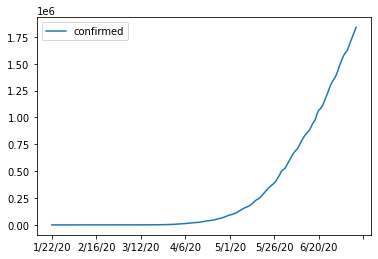

In [17]:
brazil.plot()

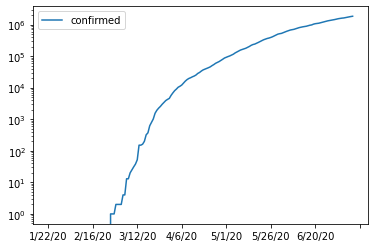

In [21]:
brazil.plot(logy=True)

In [28]:
brazil.shape

(172, 1)

In [35]:
weekday = pd.to_datetime(brazil.index).weekday

In [37]:
brazil['weekday'] = weekday

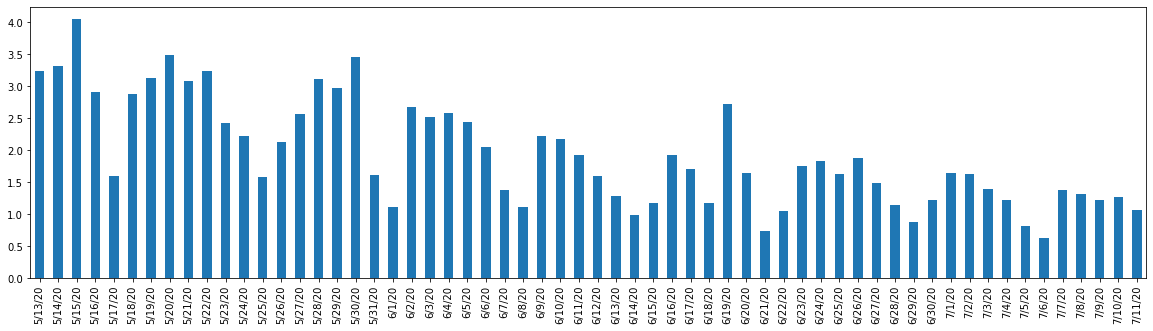

In [85]:
brazil['rolling_mean'] = brazil['confirmed'].rolling(window=2).mean().fillna(0)
brazil['stats']=(brazil['confirmed']-brazil['rolling_mean'])/(brazil['rolling_mean']+EPS)*100
brazil['stats'][-60:].plot.bar(figsize=(20,5))

In [101]:
brazil['new_cases']=brazil['confirmed'][1:]-brazil['confirmed'][:-1].values

In [102]:
brazil

,confirmed,weekday,rolling_mean,stats,new_cases
1/22/20,0,2,0.0,0,NaN
1/23/20,0,3,0.0,0,0
1/24/20,0,4,0.0,0,0
1/25/20,0,5,0.0,0,0
1/26/20,0,6,0.0,0,0
...,...,...,...,...,...
7/7/20,1668589,1,1645936.5,1.37627,45305
7/8/20,1713160,2,1690874.5,1.31799,44571
7/9/20,1755779,3,1734469.5,1.22859,42619
7/10/20,1800827,4,1778303.0,1.2666,45048


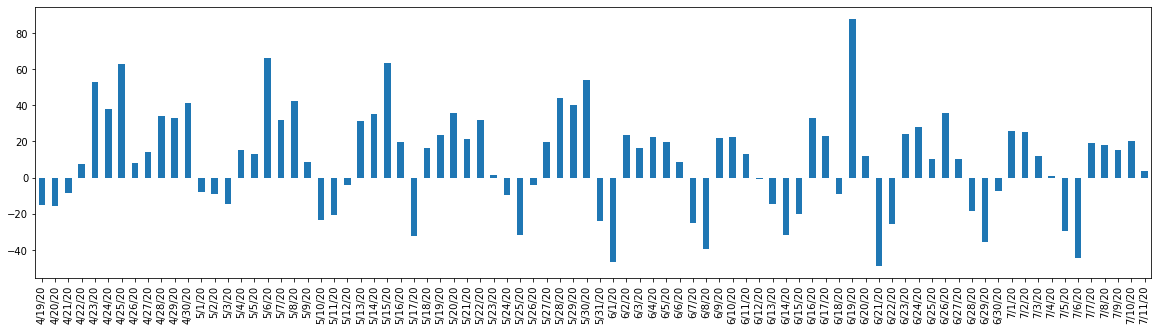

In [110]:
brazil['rolling_mean'] = brazil['new_cases'].rolling(window=7).mean().fillna(0)
brazil['stats']=(brazil['new_cases']-brazil['rolling_mean'])/(brazil['rolling_mean']+EPS)*100
brazil['stats'][-7*4*3:].plot.bar(figsize=(20,5))

In [216]:
stats = brazil['stats'][-7*4*3:].fillna(0).values.reshape(-1,7)
stats = pd.DataFrame(stats, columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

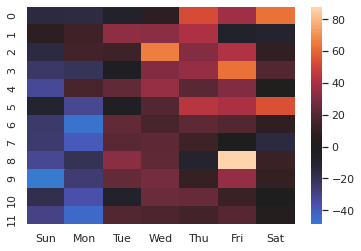

In [217]:
ax = sns.heatmap(stats, center=0)

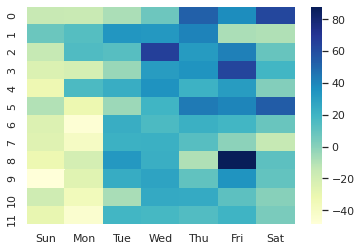

In [218]:
# plot using a color palette
sns.heatmap(stats, cmap="YlGnBu")

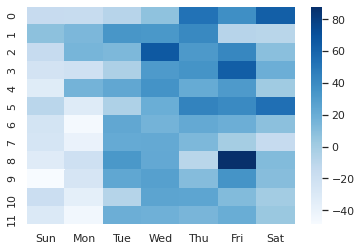

In [219]:
sns.heatmap(stats, cmap="Blues")


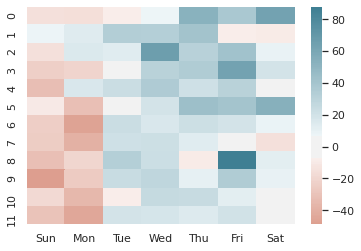

In [220]:
cmap = sns.diverging_palette(20, 220, sep=20, as_cmap=True)
sns.heatmap(stats, center=0, cmap=cmap)

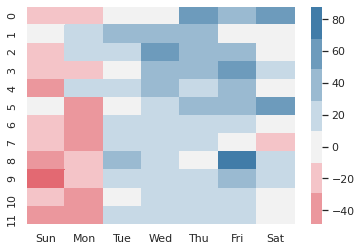

In [221]:
sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9))

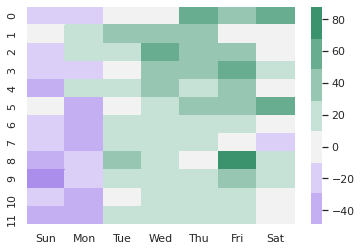

In [222]:
sns.heatmap(stats, center=0, cmap=sns.diverging_palette(275, 150, s=80, l=55, n=9))


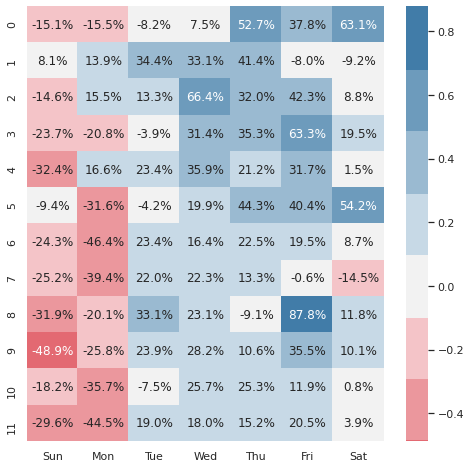

In [223]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(stats/100, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 annot=True,
                 fmt=".1%"

                 )

In [224]:
plt.title?

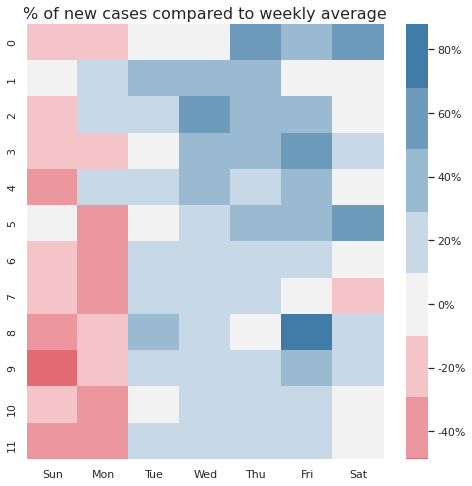

In [225]:
plt.figure(figsize=(8, 8))
plt.title('% of new cases compared to weekly average', fontsize=16)
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'}
                 )


In [226]:
stats

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,-15.125744,-15.537457,-8.222484,7.507025,52.735710,37.758460,63.094503
1,8.124028,13.927274,34.377902,33.075925,41.352857,-8.003354,-9.238670
2,-14.574188,15.504930,13.323070,66.415207,32.000988,42.337088,8.832957
3,-23.667307,-20.843310,-3.854427,31.380852,35.321700,63.333651,19.483538
4,-32.403261,16.604099,23.430944,35.898346,21.168702,31.665747,1.465488
5,-9.366991,-31.557768,-4.247635,19.918997,44.297743,40.379517,54.207439
6,-24.251837,-46.429208,23.386188,16.397689,22.507824,19.492816,8.668853
7,-25.168307,-39.447960,22.005757,22.288217,13.304273,-0.636476,-14.487696
8,-31.897012,-20.087471,33.067300,23.149742,-9.103095,87.844863,11.792320
9,-48.852432,-25.800302,23.947431,28.218594,10.564783,35.511297,10.062661


In [245]:
brazil.index=pd.to_datetime(brazil.index)

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,-15.1257,-15.5375,-8.22248,7.50703,52.7357,37.7585,63.0945
1,8.12403,13.9273,34.3779,33.0759,41.3529,-8.00335,-9.23867
2,-14.5742,15.5049,13.3231,66.4152,32.001,42.3371,8.83296
3,-23.6673,-20.8433,-3.85443,31.3809,35.3217,63.3337,19.4835
4,-32.4033,16.6041,23.4309,35.8983,21.1687,31.6657,1.46549
5,-9.36699,-31.5578,-4.24763,19.919,44.2977,40.3795,54.2074
6,-24.2518,-46.4292,23.3862,16.3977,22.5078,19.4928,8.66885
7,-25.1683,-39.448,22.0058,22.2882,13.3043,-0.636476,-14.4877
8,-31.897,-20.0875,33.0673,23.1497,-9.1031,87.8449,11.7923
9,-48.8524,-25.8003,23.9474,28.2186,10.5648,35.5113,10.0627


In [352]:
month_label

0           Apr
1           Apr
2           Apr
3     Apr - May
4           May
5           May
6           May
7           May
8     Jun - May
9           Jun
10          Jun
11          Jun
12    Jun - Jul
13          Jul
dtype: object

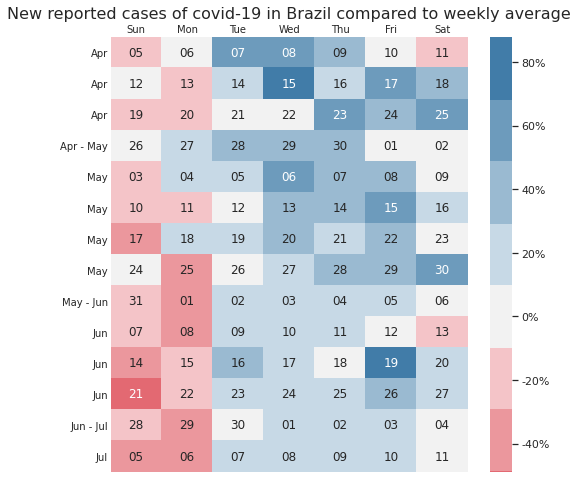

In [378]:
n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%b"))
month_label = month_label.apply(lambda x: f"{x['Sun']} - {x['Sat']}" if x['Sun']!=x['Sat'] else x['Sun'], axis=1)
stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 cases in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},
                 annot=dates.values,
                 fmt = ''
                 )
ax.set_title('New reported cases of covid-19 in Brazil compared to weekly average', fontsize=16, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

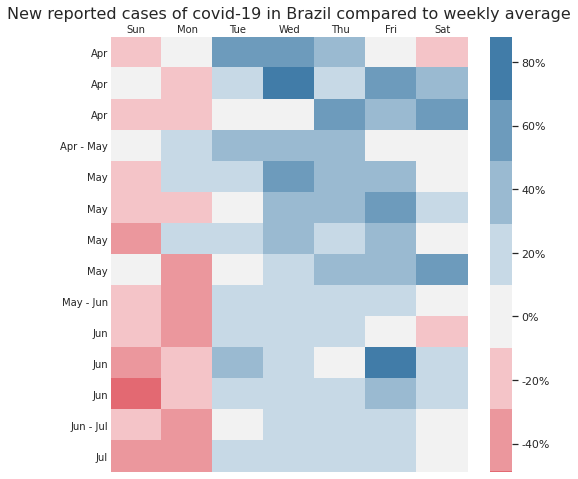

In [421]:
n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%b"))
month_label = month_label.apply(lambda x: f"{x['Sun']} - {x['Sat']}" if x['Sun']!=x['Sat'] else x['Sun'], axis=1)
stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 cases in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},a
                 #annot=dates.values,
                 fmt = ''
                 )
ax.set_title('New reported cases of covid-19 in Brazil compared to weekly average', fontsize=16, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

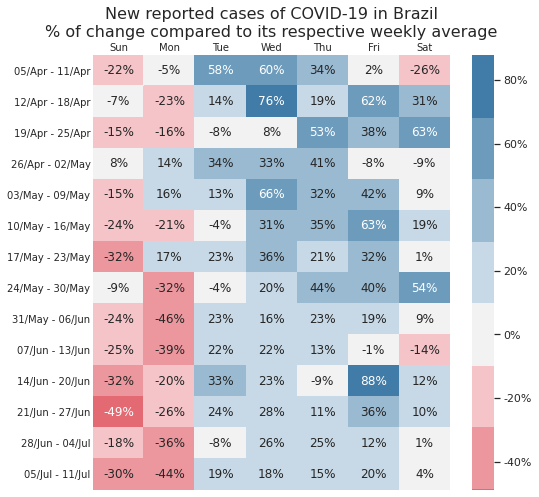

In [483]:
n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%d/%b"))
month_label = month_label.apply(lambda x: f"{x['Sun']} - {x['Sat']}" if x['Sun']!=x['Sat'] else x['Sun'], axis=1)
stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 cases in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},
                 annot=stats/100,
                 fmt = '.0%'
                 )
ax.set_title('New reported cases of COVID-19 in Brazil\n% of change compared to its respective weekly average', fontsize=16, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

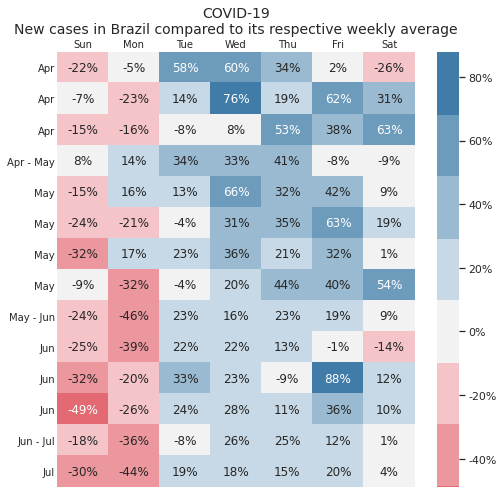

In [480]:
n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%b"))
month_label = month_label.apply(lambda x: f"{x['Sun']} - {x['Sat']}" if x['Sun']!=x['Sat'] else x['Sun'], axis=1)
stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 cases in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},
                 annot=stats/100,
                 fmt = '.0%'
                 )
ax.set_title('COVID-19\nNew cases in Brazil compared to its respective weekly average', fontsize=14, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

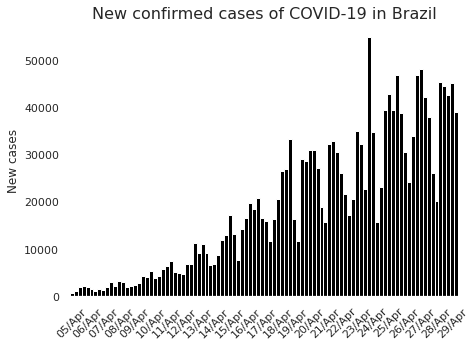

In [420]:
new_cases = brazil['new_cases'][-7*n_weeks:].copy()

new_cases.index = new_cases.index.strftime("%d/%b")
ax = new_cases.plot.bar(figsize=(7,5), width=1, color='black')
_ = ax.set_xticks(ax.get_xticks()[::4])
ax.xaxis.set_tick_params(rotation=45)
ax.patch.set_facecolor('white')
#plt.xlabel('Notification Date')
plt.ylabel('New cases')
_=plt.title('New confirmed cases of COVID-19 in Brazil', fontsize=16)

In [389]:
brazil['new_cases']

Index(['22/Jan', '23/Jan', '24/Jan', '25/Jan', '26/Jan', '27/Jan', '28/Jan',
       '29/Jan', '30/Jan', '31/Jan',
       ...
       '02/Jul', '03/Jul', '04/Jul', '05/Jul', '06/Jul', '07/Jul', '08/Jul',
       '09/Jul', '10/Jul', '11/Jul'],
      dtype='object', length=172)

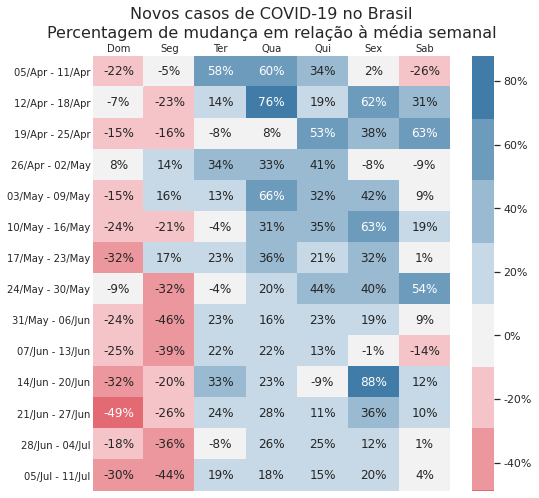

In [488]:
dias_semanas = ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab']
month_en_br = {'Apr': 'Abr',
               'May': 'Mai',
               'Jun': 'Jun',
               'Jul': 'Jul',}

n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = dias_semanas)


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = dias_semanas)

#month_label = dates.copy()
#month_label = month_label.apply(lambda x: x.dt.strftime("%b"))
#month_label = month_label.replace(month_en_br)
#month_label = month_label.apply(lambda x: f"{x['Dom']} - {x['Sab']}" if x['Dom']!=x['Sab'] else x['Dom'], axis=1)

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%d/%b"))
month_label = month_label.apply(lambda x: f"{x['Dom']} - {x['Sab']}" if x['Dom']!=x['Sab'] else x['Dom'], axis=1)
stats.index=month_label


stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 cases in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},
                 annot=stats/100,
                 fmt = '.0%'
                 )
ax.set_title('Novos casos de COVID-19 no Brasil\nPercentagem de mudança em relação à média semanal', fontsize=16, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

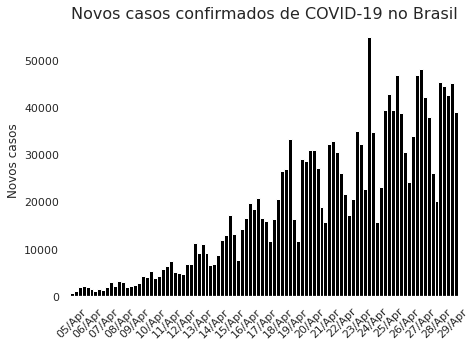

In [485]:
new_cases = brazil['new_cases'][-7*n_weeks:].copy()

new_cases.index = new_cases.index.strftime("%d/%b")
ax = new_cases.plot.bar(figsize=(7,5), width=1, color='black')
_ = ax.set_xticks(ax.get_xticks()[::4])
ax.xaxis.set_tick_params(rotation=45)
ax.patch.set_facecolor('white')
#plt.xlabel('Notification Date')
plt.ylabel('Novos casos')
_=plt.title('Novos casos confirmados de COVID-19 no Brasil', fontsize=16)